In [1]:

import os
import requests
import json
import pandas as pd
import numpy as np
import itertools
from datetime import datetime
import matplotlib.pyplot as plt
import scipy.stats as sts


In [2]:

# Import CSV's
file_path = os.path.join(".","Resources","covid_tx_df.csv")
covid_tx_df = pd.read_csv(file_path)
file_path = os.path.join(".","Resources","covid_ny_df.csv")
covid_ny_df = pd.read_csv(file_path)
file_path = os.path.join(".","Resources", "covid_all_df.csv")
covid_all_df = pd.read_csv(file_path)


In [3]:

#Check imports
covid_tx_df.head()


,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200924,TX,723919,5136914.0,NaN,5860833,3204.0,NaN,1041.0,NaN,...,5860833,138,0,4fc5c5dcd95064fad8d66ca0befd27f534cabd93,0,0,0,0,0,NaN
1,20200923,TX,719599,5021075.0,NaN,5740674,3195.0,NaN,1041.0,NaN,...,5740674,135,0,b782ae3cef51213c4192af8df10043e5459198fc,0,0,0,0,0,NaN
2,20200922,TX,716207,4951525.0,NaN,5667732,3207.0,NaN,1073.0,NaN,...,5667732,77,0,8bf3860f07ce774ea0ccb8ca66b6e61182f53565,0,0,0,0,0,NaN
3,20200921,TX,698387,4924111.0,NaN,5622498,3132.0,NaN,1057.0,NaN,...,5622498,24,0,70e4f48d35b0756db317e9a5076e409da0b732c3,0,0,0,0,0,NaN
4,20200920,TX,688534,4904954.0,NaN,5593488,3081.0,NaN,1057.0,NaN,...,5593488,45,0,dda19cfcd03fde717fc7185489907e372c264b25,0,0,0,0,0,NaN


In [4]:

#Check imports
covid_ny_df.head()


,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200924,NY,452847,9775798,NaN,10228645,500.0,89995.0,145.0,NaN,...,10228645,2,0,63ceae8617c69dd2e696b201ec2dd6059b8d0350,0,0,0,0,0,NaN
1,20200923,NY,451892,9683800,NaN,10135692,490.0,89995.0,141.0,NaN,...,10135692,5,0,73a23ab7c0b6b78e67d67b6925fc08a799485733,0,0,0,0,0,NaN
2,20200922,NY,451227,9613535,NaN,10064762,470.0,89995.0,133.0,NaN,...,10064762,4,0,acfffc57985c0dd288e364f084a74119a9415495,0,0,0,0,0,NaN
3,20200921,NY,450473,9530292,NaN,9980765,468.0,89995.0,134.0,NaN,...,9980765,1,0,6e223bb0204780c57bf975ab107522993c6290f8,0,0,0,0,0,NaN
4,20200920,NY,449900,9472546,NaN,9922446,468.0,89995.0,132.0,NaN,...,9922446,2,0,b9792dc99d6549db085101b4cec82e1ef562405f,0,0,0,0,0,NaN


In [5]:

#Check imports
covid_all_df.head()


,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200924,AK,7941.0,425257.0,NaN,433198.0,43.0,NaN,NaN,NaN,...,433198,0,0,b83363bdfb4b0d19318d00489c44e906270412f1,0,0,0,0,0,NaN
1,20200924,AL,148206.0,944747.0,NaN,1078180.0,744.0,16778.0,NaN,1679.0,...,1092953,18,80,4b1b271eafc1e79991c11cae326c455bd34ae063,0,0,0,0,0,NaN
2,20200924,AR,79049.0,840737.0,NaN,917413.0,450.0,5160.0,216.0,NaN,...,919786,17,62,3bb6b474a294e70889229d31b3d1615e78236173,0,0,0,0,0,NaN
3,20200924,AS,0.0,1571.0,NaN,1571.0,NaN,NaN,NaN,NaN,...,1571,0,0,f949dd0d4f1a5cc85607dc1e308d0088f67199bd,0,0,0,0,0,NaN
4,20200924,AZ,215852.0,1204565.0,NaN,1420417.0,565.0,21942.0,122.0,NaN,...,1420417,34,17,793697b0c3c6f8507298dd52b6474cc33d815148,0,0,0,0,0,NaN


In [6]:

# Columns needed
columns = ["date","state","positive","total"]

#Reduce TX Columns
covid_tx_df = covid_tx_df[columns]

#Reduce NY Columns
covid_ny_df = covid_ny_df[columns]

#Merge TX and NY
merge_df = pd.merge(covid_tx_df, covid_ny_df, on="date")

#Add month and day column
month = merge_df["date"].astype(str).str[4:6:]
day = merge_df["date"].astype(str).str[6:]

merge_df["month"] = month
merge_df["day"] = day

#Make Titles more descriptive
merge_df = merge_df.rename(columns={"positive_x":"tx_pos", 
                                    "total_x":"tx_tot",
                                    "positive_y":"ny_pos",
                                    "total_y":"ny_tot"})

#Add percent positive columns
merge_df["tx_per_pos"] =  merge_df["tx_pos"]/merge_df["tx_tot"]
merge_df["ny_per_pos"] = merge_df["ny_pos"]/merge_df["ny_tot"]

merge_df["tx_per_pos"] = merge_df["tx_per_pos"].round(4)
merge_df["ny_per_pos"] = merge_df["ny_per_pos"].round(4)

merge_df.head()


,date,state_x,tx_pos,tx_tot,state_y,ny_pos,ny_tot,month,day,tx_per_pos,ny_per_pos
0,20200924,TX,723919,5860833,NY,452847,10228645,09,24,0.1235,0.0443
1,20200923,TX,719599,5740674,NY,451892,10135692,09,23,0.1254,0.0446
2,20200922,TX,716207,5667732,NY,451227,10064762,09,22,0.1264,0.0448
3,20200921,TX,698387,5622498,NY,450473,9980765,09,21,0.1242,0.0451
4,20200920,TX,688534,5593488,NY,449900,9922446,09,20,0.1231,0.0453


In [7]:

#Reduce 50 States Columns
covid_all_df = covid_all_df[columns]

#Add month and year column
month = covid_all_df["date"].astype(str).str[4:6:]

#Columns for day, month, year
covid_all_df["month"] = month

#Add percent positive columns
covid_all_df["percent"] = covid_all_df["positive"]/covid_all_df["total"]
covid_all_df["percent"] = covid_all_df["percent"].round(4)

covid_all_df.head()


,date,state,positive,total,month,percent
0,20200924,AK,7941.0,433198,09,0.0183
1,20200924,AL,148206.0,1092953,09,0.1356
2,20200924,AR,79049.0,919786,09,0.0859
3,20200924,AS,0.0,1571,09,0.0000
4,20200924,AZ,215852.0,1420417,09,0.1520


In [8]:

# For Checking Positive Percentages for outliers
#Check data
check_data_df = merge_df.drop(columns = ["date","tx_pos","ny_pos","state_x","state_y"])  


check_data_df = check_data_df.rename(columns={"tx_per_pos":"TX_%",
                                          "ny_per_pos":"NY_%",
                                          "tx_tot":"TX_tot",
                                          "ny_tot":"NY_tot"})
check_data_df.head()

,TX_tot,NY_tot,month,day,TX_%,NY_%
0,5860833,10228645,09,24,0.1235,0.0443
1,5740674,10135692,09,23,0.1254,0.0446
2,5667732,10064762,09,22,0.1264,0.0448
3,5622498,9980765,09,21,0.1242,0.0451
4,5593488,9922446,09,20,0.1231,0.0453


In [9]:

#Export to csv
output_file = os.path.join("Output_data","% positive tests Aug and Sept.csv")
check_data_df.to_csv(output_file, index=False, header=True)


In [10]:

# Correct Value types  
check_data_df[["TX_%","NY_%", "TX_tot","NY_tot"]].astype("int64")

columns = ["TX_%","NY_%", "TX_tot","NY_tot"]

check_data_df.head()


,TX_tot,NY_tot,month,day,TX_%,NY_%
0,5860833,10228645,09,24,0.1235,0.0443
1,5740674,10135692,09,23,0.1254,0.0446
2,5667732,10064762,09,22,0.1264,0.0448
3,5622498,9980765,09,21,0.1242,0.0451
4,5593488,9922446,09,20,0.1231,0.0453


In [11]:

#Lists
month_names = ["Mar","Apr","May","Jun","Jul","Aug","Sep"]
months = merge_df.sort_values(by=["month"])["month"].unique()
graphs = ["Totals","Totals","Percent","Percent"]
cols_tot = ["TX_tot","NY_tot"]
cols_per = ["TX_%","NY_%"]
cols_tx = ["TX_%", "TX_tot"]
cols_ny = ["NY_%", "NY_tot"]
columns = ["TX_tot","NY_tot","TX_%","NY_%"]
states=["TX","NY","TX","NY"]


In [12]:

#%matplotlib notebook


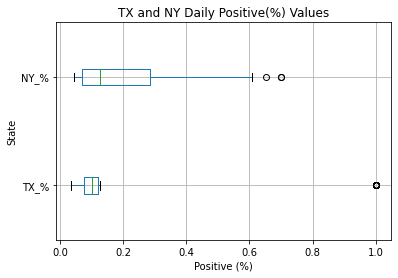

In [13]:

#Use boxplots to find data symmetry for the Daily Percent Positives
percentages_df = check_data_df.drop(columns=cols_tot)
percentages_df.boxplot(vert=False)

plt.title("TX and NY Daily Positive(%) Values")
plt.xlabel("Positive (%)")
plt.ylabel("State")

file_name = (f"TX vs NY Positive(%) Boxplot.png") 
output_path = os.path.join(".", "Images", file_name)
plt.savefig(output_path)


In [14]:

"The boxplots show the daily Percent Positives are skewed left due to the natural limit of 0%."
"NY has a much wider range of Positive Tests showing a more normalized distribution."
"Need to find out where the outliers lie relative to time."


'Need to find out where the outliers lie relative to time.'

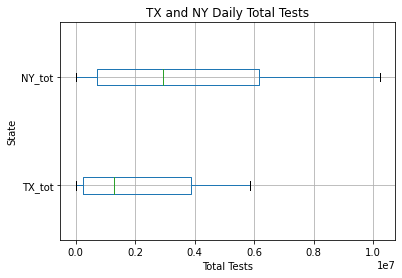

In [15]:

#Use boxplots to find data symmetry for the Daily Test Totals
totals_df = check_data_df.drop(columns=cols_per)
totals_df.boxplot(vert=False)

plt.title("TX and NY Daily Total Tests")
plt.xlabel("Total Tests")
plt.ylabel("State")

file_name = (f"TX vs NY Totals Boxplot.png") 
output_path = os.path.join(".", "Images", file_name)
plt.savefig(output_path)


In [16]:

"The Daily Testing Totals is much more normalized though still showing a left skew."
"No outliers for the totals over the entire time period."


'No outliers for the totals over the entire time period.'

In [17]:

"Shows the exact values for the outliers in the boxplot for Percent Positives and Daily Totals"
"over the entire dataset."


'over the entire dataset.'

In [18]:

#Percent Positive and Total Outliers by State
for column in columns:     
    #Outliers by state
    values = check_data_df[column]
    
    #Quantiles
    quantiles = values.quantile([.25,.5,.75])
    Q1 = quantiles[0.25]
    Q3 = quantiles[0.75]
    iqr = Q3 - Q1

    #Outlier boundaries
    lower_bound = Q1 - (1.5*iqr)
    upper_bound = Q3 + (1.5*iqr)    
    
    #Outliers
    outliers = values.loc[(values < lower_bound) | (values > upper_bound)].values
    
    print(column,outliers)           


TX_tot []
NY_tot []
TX_% [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
NY_% [0.7013 0.7013 0.6528]


In [19]:

#Create DF with month in index to find outliers by month
by_month = check_data_df
months = by_month.sort_values(by=["month"])["month"].unique()
by_month = by_month.sort_values(by=["month"]).set_index("month")
monthly_outliers = pd.DataFrame()
by_month.head()


,TX_tot,NY_tot,day,TX_%,NY_%
month,,,,,
03,1,78,04,1.0000,0.0769
03,42992,205186,31,0.0760,0.3694
03,35880,186468,30,0.0802,0.3566
03,25760,172360,29,0.0991,0.3453
03,25260,155934,28,0.0812,0.3355


In [20]:

#Percent Positive and Total Outliers each month by State
x=0
for column in columns:
    for month in months: 
        #Outliers by state
        values = by_month.loc[month,column]
    
        #Quantiles
        quantiles = values.quantile([.25,.5,.75])
        Q1 = quantiles[0.25]
        Q3 = quantiles[0.75]
        iqr = Q3 - Q1

        #Outlier boundaries
        lower_bound = Q1 - (1.5*iqr)
        upper_bound = Q3 + (1.5*iqr)    
    
        #Outliers
        outliers = values.loc[(values < lower_bound) | (values > upper_bound)].values
    
        print(column,month,outliers)           
    x=x+1
    

TX_tot 03 [42992 35880]
TX_tot 04 []
TX_tot 05 []
TX_tot 06 []
TX_tot 07 []
TX_tot 08 []
TX_tot 09 []
NY_tot 03 []
NY_tot 04 []
NY_tot 05 []
NY_tot 06 []
NY_tot 07 []
NY_tot 08 []
NY_tot 09 []
TX_% 03 []
TX_% 04 []
TX_% 05 []
TX_% 06 []
TX_% 07 []
TX_% 08 [0.1149 0.1149]
TX_% 09 []
NY_% 03 [0.6068 0.6528 0.7013 0.7013]
NY_% 04 []
NY_% 05 []
NY_% 06 []
NY_% 07 []
NY_% 08 []
NY_% 09 []


In [21]:

"The only statistically relevant Outliers are in TX during August, assuming the the reason for TX totals are the last days of the March as testing increased through the month. The same would go for the high percentages in both NY and TX. Need to investigate TX in August"


'The only statistically relevant Outliers are in TX during August, assuming the the reason for TX totals are the last days of the March as testing increased through the month. The same would go for the high percentages in both NY and TX. Need to investigate TX in August'

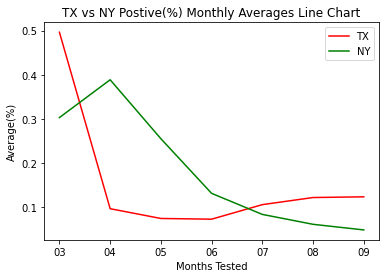

In [22]:

#Investigate the mean by month TX & NY
means = check_data_df.groupby("month").mean()

#Y Axis
tx_avg = means["TX_%"]
ny_avg = means['NY_%']

#Line Chart
plt.hlines(0,0,10, alpha=0.25)
tx_handle = plt.plot(months, tx_avg, color='red',label="TX")
ny_handle = plt.plot(months, ny_avg, color='green',label="NY")

plt.title("TX vs NY Postive(%) Monthly Averages Line Chart")
plt.xlabel("Months Tested")
plt.ylabel("Average(%)")

plt.legend(handles=[tx_handle[0],ny_handle[0]],loc="best")


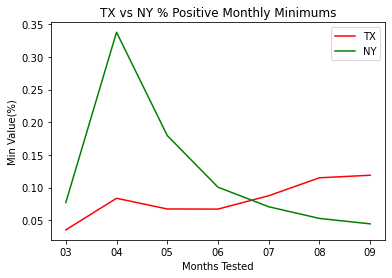

In [23]:

#Investigate the minimums by month TX & NY
mins =  check_data_df.groupby("month").min()

#Y Axis
tx_avg = mins["TX_%"]
ny_avg = mins['NY_%']

#Line Chart
plt.hlines(0,0,10, alpha=0.25)
tx_handle = plt.plot(months, tx_avg, color='red',label="TX")
ny_handle = plt.plot(months, ny_avg, color='green',label="NY")

plt.title("TX vs NY % Positive Monthly Minimums")
plt.xlabel("Months Tested")
plt.ylabel("Min Value(%)")

plt.legend(handles=[tx_handle[0],ny_handle[0]],loc="best")

file_name = (f"TX vs NY Posititves(%) Monthly Averages Line Chart.png") 
output_path = os.path.join(".", "Images", file_name)
plt.savefig(output_path)


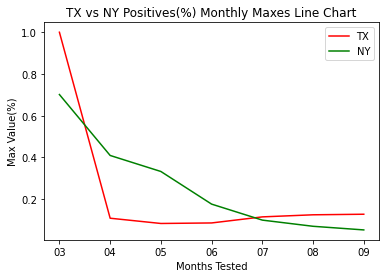

In [24]:

#Investigate the maximums by month TX & NY
maxes = check_data_df.groupby("month").max()

#Y Axis
tx_avg = maxes["TX_%"]
ny_avg = maxes['NY_%']

#Line Chart
plt.hlines(0,0,10, alpha=0.25)
tx_handle = plt.plot(months, tx_avg, color='red',label="TX")
ny_handle = plt.plot(months, ny_avg, color='green',label="NY")

plt.title("TX vs NY Positives(%) Monthly Maxes Line Chart")
plt.xlabel("Months Tested")
plt.ylabel("Max Value(%)")

plt.legend(handles=[tx_handle[0],ny_handle[0]],loc="best")


Shows the outliers were the low values at the end of the month.
Data is still valid, but shows a spike two weeks into the month that could be correlated to people going back to work.


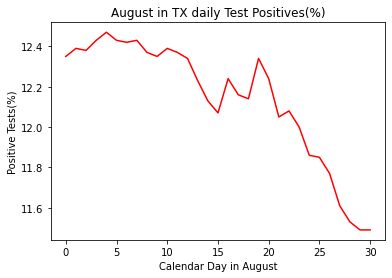

In [25]:

#Investigate TX values for August 
tx_aug = check_data_df.loc[check_data_df["month"]=="08",["TX_%"]]*100
tx_aug.head()

#X_axis
days = tx_aug["TX_%"].count()
time = np.arange(0, days,1)

#Line Chart
plt.plot(time, tx_aug, color='red',label="TX")

plt.title("August in TX daily Test Positives(%)")
plt.xlabel("Calendar Day in August")
plt.ylabel("Positive Tests(%)")

file_name = (f"TX August Daily Posititves(%) .png") 
output_path = os.path.join(".", "Images", file_name)
plt.savefig(output_path)

print("Shows the outliers were the low values at the end of the month.")
print("Data is still valid, but shows a spike two weeks into the month that could be correlated to people going back to work.")


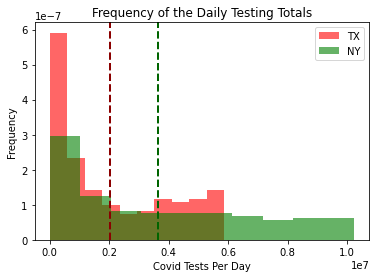

In [26]:

#TX and NY Totals Data
tx=check_data_df['TX_tot']
ny=check_data_df['NY_tot']

#Visualization and test distribution of Total Covid Tests in March-September
plt.hist(tx, density=True, color='red', alpha=0.6, label="TX")
plt.hist(ny, density=True, color='green', alpha=0.6, label="NY")
plt.axvline(tx.mean(), color='darkred', linestyle='dashed', linewidth=2)
plt.axvline(ny.mean(), color='darkgreen', linestyle='dashed', linewidth=2)
plt.ylabel("Frequency")
plt.xlabel("Covid Tests Per Day")
plt.title("Frequency of the Daily Testing Totals")
plt.legend()

file_name = (f"TX vs NY Daily Testing Totals Frequency.png") 
output_path = os.path.join(".", "Images", file_name)
plt.savefig(output_path)


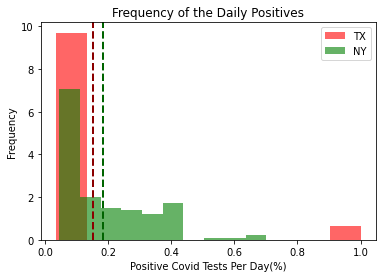

In [27]:

#TX and NY % Positive Data
tx=check_data_df['TX_%']
ny=check_data_df['NY_%']


#Visualization and test distribution of Total Covid Tests in March-September
plt.hist(tx, density=True, color='red', alpha=0.6, label="TX")
plt.hist(ny, density=True, color='green', alpha=0.6, label="NY")
plt.axvline(tx.mean(), color='darkred', linestyle='dashed', linewidth=2)
plt.axvline(ny.mean(), color='darkgreen', linestyle='dashed', linewidth=2)
plt.ylabel("Frequency")
plt.xlabel("Positive Covid Tests Per Day(%)")
plt.title("Frequency of the Daily Positives")
plt.legend() 

file_name = (f"TX vs NY % Positives Frequency.png") 
output_path = os.path.join(".", "Images", file_name)
plt.savefig(output_path)


In [28]:

#Export to csv
output_file = os.path.join("Output_data","% positive tests by month.csv")
check_data_df.to_csv(output_file, index=False, header=True)


In [29]:
#### Reiterated until histogram had normalcy
#Months to use for comparison
#Summary is that only August and September should be used to Compare to unemployment Data

# Shows quality of final two months August and Sept
months = ["09","08"] #, "07", "06"]

#Drop outlier months
clean_data_df = check_data_df.loc[check_data_df["month"].isin(months)]


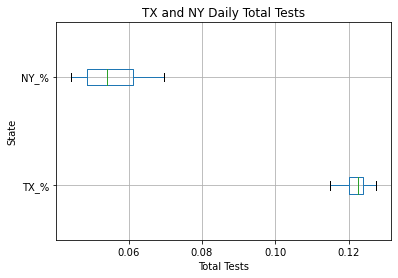

In [30]:

#Use boxplots to find data symmetry for the Daily Percent Positives
percentages_df = clean_data_df.drop(columns=cols_tot)
percentages_df.boxplot(vert=False)

plt.title("TX and NY Daily Total Tests")
plt.xlabel("Total Tests")
plt.ylabel("State")

file_name = (f"TX vs NY Positives(%) Boxplot August and Sept.png") 
output_path = os.path.join(".", "Images", file_name)
plt.savefig(output_path)


In [31]:

print(clean_data_df["TX_%"].count())
print(clean_data_df["NY_%"].count())
clean_data_df.head()


55
55


,TX_tot,NY_tot,month,day,TX_%,NY_%
0,5860833,10228645,09,24,0.1235,0.0443
1,5740674,10135692,09,23,0.1254,0.0446
2,5667732,10064762,09,22,0.1264,0.0448
3,5622498,9980765,09,21,0.1242,0.0451
4,5593488,9922446,09,20,0.1231,0.0453


In [32]:


by_month = clean_data_df.sort_values(by=["month"]).set_index("month")
columns = ["TX_%","NY_%"]
#Percent Positive Outliers each month by State
for column in columns:     
    #Outliers by state
    values = clean_data_df[column]
    
    #Quantiles
    quantiles = values.quantile([.25,.5,.75])
    Q1 = quantiles[0.25]
    Q3 = quantiles[0.75]
    iqr = Q3 - Q1

    #Outlier boundaries
    lower_bound = Q1 - (1.5*iqr)
    upper_bound = Q3 + (1.5*iqr)    
    
    #Outliers
    outliers = values.loc[(values < lower_bound) | (values > upper_bound)].values
    print(column,outliers)   
    
    for outlier in outliers:
        value =   by_month[by_month[column] == outlier]
        print(value)
        

TX_% []
NY_% []


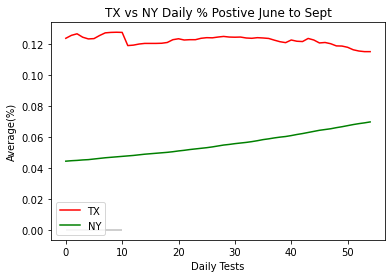

In [33]:

#Investigate % in TX & NY
time = clean_data_df["TX_%"].count()
x_axis = np.arange(0,time,1)

#Y Axis
tx_avg = clean_data_df["TX_%"]
ny_avg = clean_data_df['NY_%']

#Line Chart
plt.hlines(0,0,10, alpha=0.25)
tx_handle = plt.plot(x_axis, tx_avg, color='red',label="TX")
ny_handle = plt.plot(x_axis, ny_avg, color='green',label="NY")

plt.title("TX vs NY Daily % Postive June to Sept")
plt.xlabel("Daily Tests")
plt.ylabel("Average(%)")

plt.legend(handles=[tx_handle[0],ny_handle[0]],loc="best")

file_name = (f"TX vs NY Daily % Postive August and Sept.png") 
output_path = os.path.join(".", "Images", file_name)
plt.savefig(output_path)


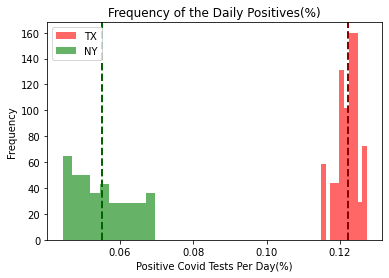

In [34]:

#TX and NY % Cleaned Positive Data
tx=clean_data_df['TX_%']
ny=clean_data_df['NY_%']


#Visualization and test distribution of Total Covid Tests in March-September
plt.hist(tx, density=True, color='red', alpha=0.6, label="TX")
plt.hist(ny, density=True, color='green', alpha=0.6, label="NY")
plt.axvline(tx.mean(), color='darkred', linestyle='dashed', linewidth=2)
plt.axvline(ny.mean(), color='darkgreen', linestyle='dashed', linewidth=2)
plt.ylabel("Frequency")
plt.xlabel("Positive Covid Tests Per Day(%)")
plt.title("Frequency of the Daily Positives(%)")
plt.legend() 

file_name = (f"TX vs NY Aug and Sept % Posititves Frequency.png") 
output_path = os.path.join(".", "Images", file_name)
plt.savefig(output_path)


In [35]:

clean_data_df.head()


,TX_tot,NY_tot,month,day,TX_%,NY_%
0,5860833,10228645,09,24,0.1235,0.0443
1,5740674,10135692,09,23,0.1254,0.0446
2,5667732,10064762,09,22,0.1264,0.0448
3,5622498,9980765,09,21,0.1242,0.0451
4,5593488,9922446,09,20,0.1231,0.0453


In [36]:
clean_exp_data_df = clean_data_df.rename(columns={"TX_tot":"tot_tx_test",
                                                  "NY_tot":"tot_ny_test",
                                                  "TX_%":"tx_per_pos",
                                                  "NY_%":"ny_per_pos",})

# Find average monthly values
clean_exp_data_df = clean_exp_data_df.set_index("month").groupby("month").mean()

clean_exp_data_df.head()

,tot_tx_test,tot_ny_test,tx_per_pos,ny_per_pos
month,,,,
08,4.360088e+06,7.067101e+06,0.121419,0.060677
09,5.389847e+06,9.281785e+06,0.123042,0.047975


In [37]:

#Export to csv
output_file = os.path.join("Output_data","% positive tests Aug and Sept.csv")
clean_exp_data_df.to_csv(output_file, index=False, header=True)
